How many dipoles will you setting? ex)3:1
Include 40uT of Earth Background Field? Enter 1 if you want, or 0 if you don't.1
Enter the dipole moment in order. ex)0 0 0.001: 0 0 0.001
Enter the position of the dipole in m units in order. At this time, the same position value cannot be input.Also, 0,0,0 cannot be input. ex)0 0 0.001: 0 0 0
How many nT or less resolution do you want? ex)1: 1


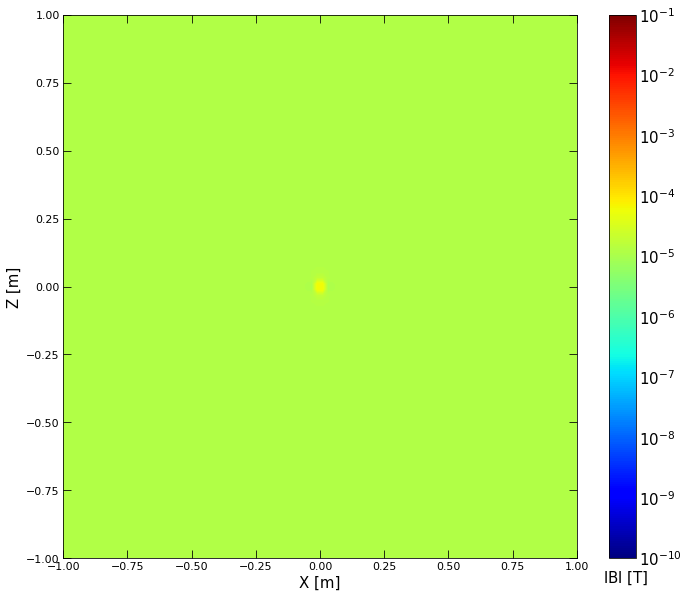

C:\Users\hyejeong\anaconda3\lib\site-packages\magpylib\_lib\fields\Moment_Dipole.py:46: RuntimeWarning: Warning: getB Position directly at moment position
  warn('Warning: getB Position directly at moment position', RuntimeWarning)
C:\Users\hyejeong\anaconda3\lib\site-packages\magpylib\_lib\fields\Moment_Dipole.py:46: RuntimeWarning: Warning: getB Position directly at moment position
  warn('Warning: getB Position directly at moment position', RuntimeWarning)


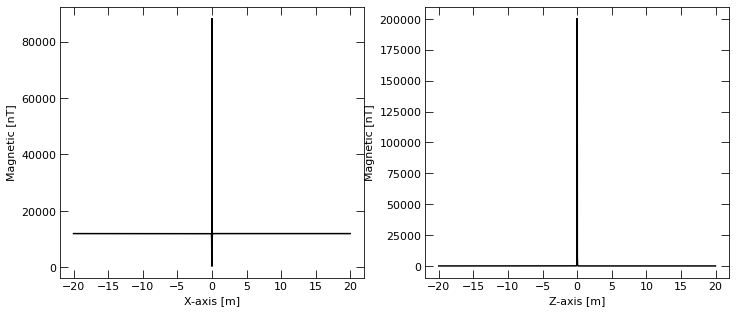

C:\Users\hyejeong\anaconda3\lib\site-packages\magpylib\_lib\fields\Moment_Dipole.py:46: RuntimeWarning: Warning: getB Position directly at moment position
  warn('Warning: getB Position directly at moment position', RuntimeWarning)
.

1.0 For resolution below nT, the magnetometer should be installed at least at the following coordinates.
X-axis(y=0, z=0): 0.0 0 0 (Unit:m) magnetic field at this point:  nan Unit:T
Z-axis(x=0, y=0): 0.0 0 0 (Unit:m) magnetic field at this point:  nan Unit:T



----------------------------------------------------------------------
Ran 1 test in 12.577s

OK


In [4]:
import unittest
import magpylib as magpy
import numpy as np
from matplotlib import pyplot as plt,cm
from magpylib import Collection, displaySystem

'''
Reference:
Jo, Hye Jeong, et al. "Analysis of a CubeSat Magnetic Cleanliness for the Space Science Mission." Journal of Space Technology and Applications 2.1 (2022): 41-51.

This code was created for magnetic field researchers.
Made by HyeJeong Jo
'''


def Cleanliness_Function():
    dipm=int(input("How many dipoles will you setting? ex)3:"))
    earth=int(input("Include 40uT of Earth Background Field? Enter 1 if you want, or 0 if you don't."))
    smoment=[]

    for z in range(dipm):
        momentz=list(float(q) for q in input("Enter the dipole moment in order. ex)0 0 0.001: ").split())
        smoment.append(momentz)
    slocate=[]
    for i in range(dipm):
        locatez=list(float(q) for q in input("Enter the position of the dipole in m units in order. At this time, the same position value cannot be input.Also, 0,0,0 cannot be input. ex)0 0 0.001: ").split())
        slocate.append(locatez)
    moment=np.array(smoment)*np.pi*4*1e-7
    i=0
    collectionlist=[]
    if(earth ==0):
        for i in range(dipm):
            collectionlist.append(magpy.source.moment.Dipole(moment=moment[i],pos=slocate[i]))
    elif(earth ==1):
        for i in range(dipm):
            collectionlist.append(magpy.source.moment.Dipole(moment=moment[i],pos=slocate[i]))
        collectionlist.append(magpy.source.current.Circular(curr=122, dim=128e5, pos=[0,0,0]))
    c=Collection(collectionlist)
    b=float(input("How many nT or less resolution do you want? ex)1: "))
    ts= np.linspace(-1,1,100)
    POS=np.array([(x,0,z) for z in ts for x in ts])
    Bs=c.getB(POS).reshape(100,100,3)
    X,Z=np.meshgrid(ts,ts)
    U, V, K=Bs[:,:,0],Bs[:,:,1],Bs[:,:,2]
    fig=plt.figure(figsize=(11.5,10))
    plt.tight_layout() 
    CZ=np.sqrt(U**2+V**2+K**2)
    CP=np.log10(CZ)
    cp=plt.contourf(X,Z,CP,1000, cmap=plt.cm.jet, vmin=-10, vmax=-1)
    plt.xlabel('X [m]',fontsize=15)
    plt.ylabel('Z [m]',fontsize=15)
    plt.tick_params(axis='x', direction='in', length=8, top=True, labelsize=11)
    plt.tick_params(axis='y', direction='in', length=8, right=True, labelsize=11)

    mynorm = plt.Normalize(vmin=-10, vmax=-1)
    sm = plt.cm.ScalarMappable(cmap=cm.jet, norm=mynorm)
    sm_=plt.colorbar(sm)
    sm_.set_ticks([-1.0,-2.0,-3.0,-4.0,-5.0,-6.0,-7.0,-8.0,-9.0,-10.0])
    sm_.set_ticklabels(['$\mathdefault{10^{-1}}$','$\mathdefault{10^{-2}}$','$\mathdefault{10^{-3}}$','$\mathdefault{10^{-4}}$','$\mathdefault{10^{-5}}$',
                      '$\mathdefault{10^{-6}}$','$\mathdefault{10^{-7}}$','$\mathdefault{10^{-8}}$','$\mathdefault{10^{-9}}$','$\mathdefault{10^{-10}}$'])
    sm_.ax.tick_params(labelsize=15)
    sm_.set_label('$\mathdefault{lBl}$ [T]', labelpad=-57, y=-0.02, rotation=0, fontsize=15)
    sm_.ax.tick_params(size=0)
    plt.show()
    def find_nearest(array, value, da):
        array = np.asarray(array)
        idx = (np.abs(array - value)).argmin()
        return da[idx]

    def scar5(place):
        A = c.getB(place)[0]
        B = c.getB(place)[1]
        C = c.getB(place)[2]
        result = np.sqrt(A ** 2 + B ** 2 + C ** 2)
        return result

    xdata = []
    ydata = []
    zdata = []
    resultdata = []

    for x in range(0,4000):
        xdata.append(x*0.01-20)
    for y in range(0,4000):
        ydata.append(0)
    for z in range(0,4000):
        zdata.append(0)    
    for i in range(len(xdata)):
        resultdata.append(float(scar5([xdata[i], ydata[i], zdata[i]])))
    
    res=np.array(resultdata)*1e9 

    plt.figure(figsize=(12,5))
    plt.subplot(121)
    plt.plot(xdata, res, color='k')
    plt.xlabel('X-axis [m]',fontsize=11)
    plt.ylabel('Magnetic [nT]',fontsize=11)
    plt.tick_params(axis='x', direction='in', length=8, top=True, labelsize=11)
    plt.tick_params(axis='y', direction='in', length=8, right=True, labelsize=11)

    near_x = find_nearest(res, b, xdata)
    collectionlist=[]

    for i in range(dipm):
        collectionlist.append(magpy.source.moment.Dipole(moment=moment[i],pos=slocate[i]))
    c=Collection(collectionlist)

    xdata = []
    ydata = []
    zdata = []
    resultdata = []
    
    for z in range(0,4000):
        zdata.append(z*0.01-20)
    for y in range(0,4000):
        ydata.append(0)
    for x in range(0,4000):
        xdata.append(0)
    
    for i in range(len(xdata)):
        resultdata.append(float(scar5([xdata[i], ydata[i], zdata[i]])))
    

    res=np.array(resultdata)*1e9 
    plt.subplot(122)
    plt.plot(zdata, res, color='k')
    plt.xlabel('Z-axis [m]',fontsize=11)
    plt.ylabel('Magnetic [nT]',fontsize=11)
    plt.tick_params(axis='x', direction='in', length=8, top=True, labelsize=11)
    plt.tick_params(axis='y', direction='in', length=8, right=True, labelsize=11)
    plt.show()

    near_z = find_nearest(res, b, zdata)

    print(b,"For resolution below nT, the magnetometer should be installed at least at the following coordinates.")
    xB=scar5([near_x,0,0])
    zB=scar5([0,0,near_z])
    print("X-axis(y=0, z=0):",near_x,0,0,"(Unit:m)","magnetic field at this point: ",xB,"Unit:T") 
    print("Z-axis(x=0, y=0):",near_z,0,0,"(Unit:m)","magnetic field at this point: ",zB,"Unit:T")

# TestCase를 작성
class CustomTests(unittest.TestCase): 
    def test_runs(self):
        Cleanliness_Function()


# unittest를 실행
if __name__ == '__main__':  
    unittest.main (argv = [ 'first-arg-is-ignored'], exit = False)